In [1]:
# Search Directories
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/michigan-water-use-data-2013-to-2022/water_use_data_2013_to_2022.csv
/kaggle/input/us-disease/US_disease_simulated.csv


In [2]:
import pandas as pd # data processing and data frames 

from matplotlib import pyplot as plt # basic visulizations and subplots
import seaborn as sns # advanced plots and visulizations 
from sklearn.preprocessing import LabelEncoder # encode categorical variables

In [3]:
data_path = '/kaggle/input/michigan-water-use-data-2013-to-2022/water_use_data_2013_to_2022.csv'
df = pd.read_csv(data_path, index_col=0)
df.head()

,county,gallons_from_great_lakes,gallons_from_groundwater,gallons_from_inland_surface,total_gallons_all_sources,industry,year
Unnamed: 0,,,,,,,
0,Alcona,0,2666085962,4695086047,7361172009,Total All Sectors,2014
1,Alger,1512160000,1608226431,799089999,3919476431,Total All Sectors,2014
2,Allegan,0,5552539983,3784550040,9337090023,Total All Sectors,2014
3,Alpena,40839120000,10948600250,2532270000,54319990250,Total All Sectors,2014
4,Antrim,0,12214548686,54526097,12269074783,Total All Sectors,2014


In [4]:
# Set index name
df.rename_axis('index', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6630 entries, 0 to 6639
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   county                       6630 non-null   object
 1   gallons_from_great_lakes     6630 non-null   int64 
 2   gallons_from_groundwater     6630 non-null   int64 
 3   gallons_from_inland_surface  6630 non-null   int64 
 4   total_gallons_all_sources    6630 non-null   int64 
 5   industry                     6630 non-null   object
 6   year                         6630 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 414.4+ KB


In [6]:
df.head()

,county,gallons_from_great_lakes,gallons_from_groundwater,gallons_from_inland_surface,total_gallons_all_sources,industry,year
index,,,,,,,
0,Alcona,0,2666085962,4695086047,7361172009,Total All Sectors,2014
1,Alger,1512160000,1608226431,799089999,3919476431,Total All Sectors,2014
2,Allegan,0,5552539983,3784550040,9337090023,Total All Sectors,2014
3,Alpena,40839120000,10948600250,2532270000,54319990250,Total All Sectors,2014
4,Antrim,0,12214548686,54526097,12269074783,Total All Sectors,2014


Text(0.5, 1.0, 'Total Public Water Used by Industry in Michigan (2013-2022)')

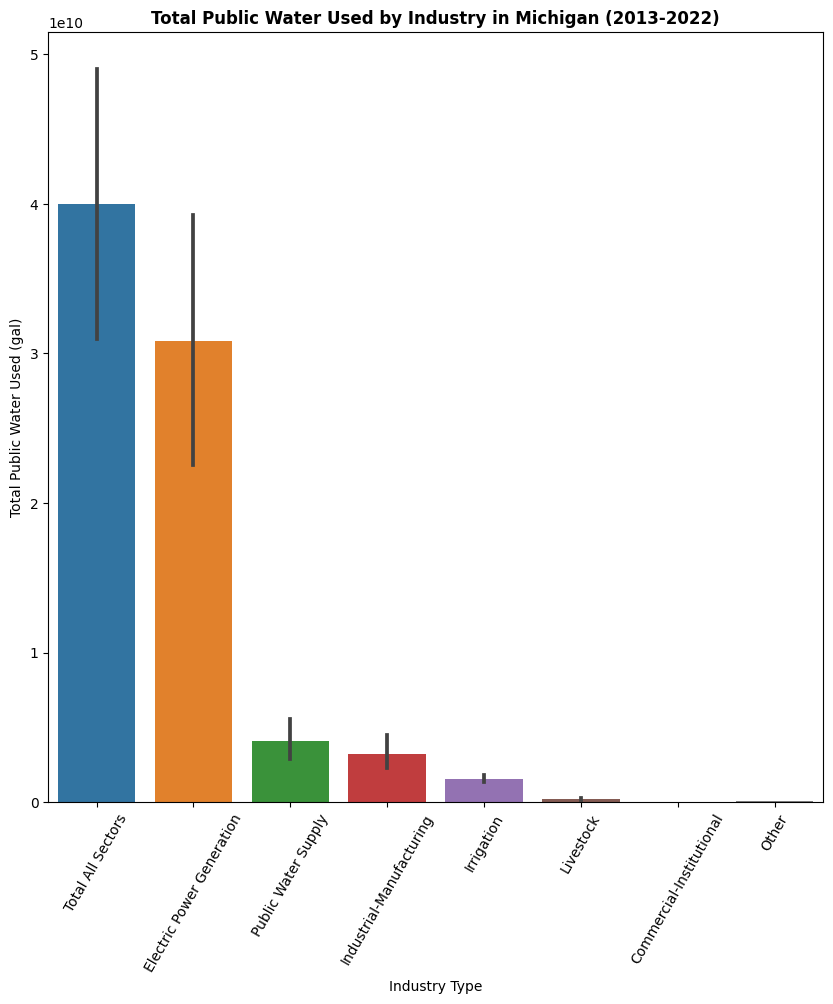

In [7]:
ordered_list = ['Total All Sectors', 
                'Electric Power Generation',
                'Public Water Supply',
                'Industrial-Manufacturing',
                'Irrigation',
                'Livestock',
                'Commercial-Institutional',
                'Other'
                ]

fig = plt.figure(figsize=(10,10))

sns.barplot(x="industry", y="total_gallons_all_sources", order=ordered_list, data=df)

plt.xticks(rotation=60)
plt.xlabel('Industry Type')
plt.ylabel('Total Public Water Used (gal)')
plt.title('Total Public Water Used by Industry in Michigan (2013-2022)', weight='bold')

In [8]:
df['industry'].unique()

array(['Total All Sectors', 'Commercial-Institutional',
       'Electric Power Generation', 'Industrial-Manufacturing',
       'Irrigation', 'Livestock', 'Other', 'Public Water Supply'],
      dtype=object)

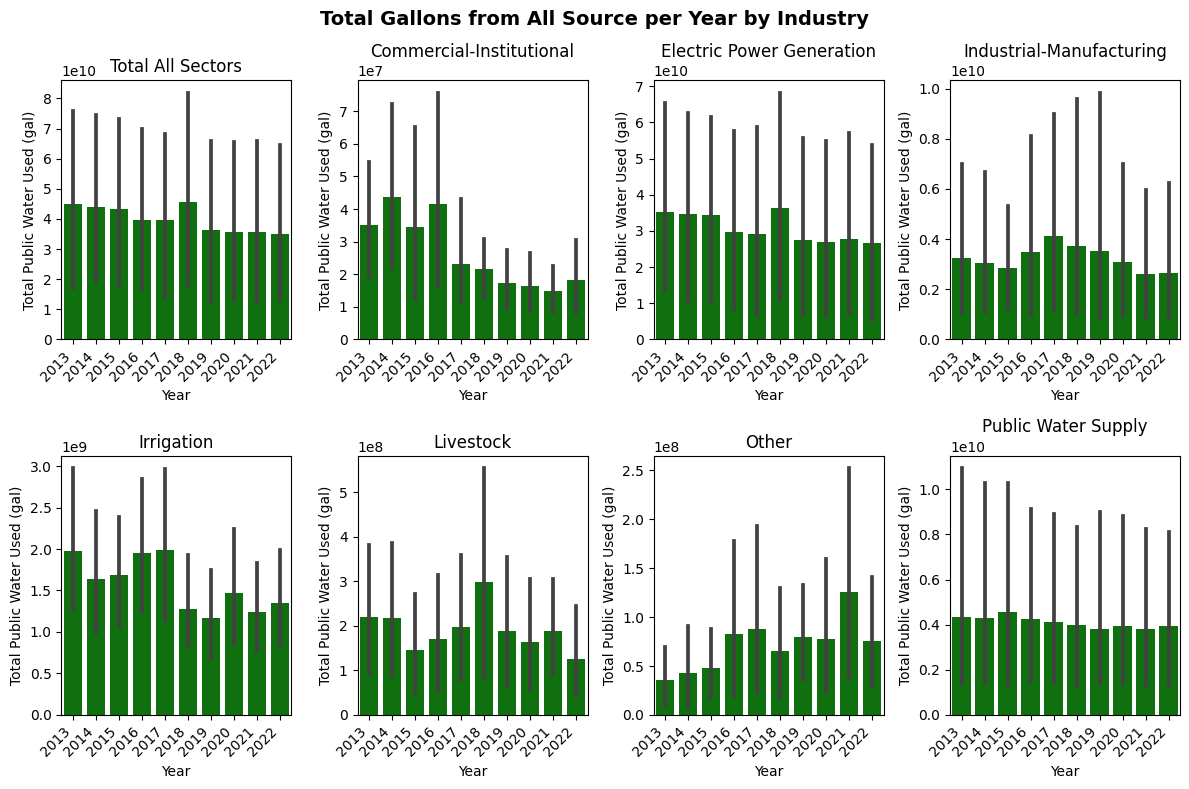

In [9]:
# Define number of rows and columns for the subplot grid
rows=2
cols=4
fig, axes = plt.subplots(rows,cols,figsize=(12,8))

# Extract unique industry types
unique_industries = df['industry'].unique()

# Loop through each subplot and industry type
for i in range(rows):
    for j in range(cols):
        if i*cols + j >= len(unique_industries): #Check if limit reached
            axes[i,j].axis('off') # Hide empty subplots
            continue
            
        # Select data for the current industry
        industry_data = df.loc[df['industry']== unique_industries[i*cols +j]] 
        
        # Create a line plot for total gallons per year for this industry
        sns.barplot(x='year',
                    y='total_gallons_all_sources',
                    data=industry_data,
                    ax=axes[i,j],
                    color='green'
                    )
        
        # Set subplot title as the industry name
        axes[i,j].set_title(unique_industries[i*cols+j])
        
        # Loop through each subplot and rotate ticks
        for tick in axes[i,j].get_xticklabels():
            tick.set_rotation(45)
            tick.set_ha('right')
            
        # Setting x and y labels
        axes[i,j].set_ylabel('Total Public Water Used (gal)')
        axes[i,j].set_xlabel('Year')
        
# Adjust layout and appearance
fig.suptitle('Total Gallons from All Source per Year by Industry',
            fontsize=14,
            weight='bold')
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

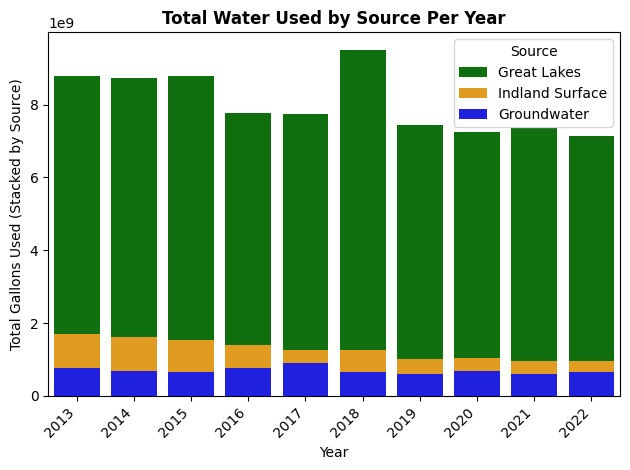

In [10]:
# Extract water source column names
water_sources = ['gallons_from_great_lakes', 'gallons_from_inland_surface', 'gallons_from_groundwater']

# Choose stacks colors
colors = ['green', 'orange', 'blue']

# Create a stacked bar plot and legend
for color, stack in zip(colors, water_sources):
    ax = sns.barplot(x="year",
                    y=stack,
                    data=df,
                    color=color,
                    errorbar=None
                    )
    
plt.legend(title='Source', labels=['Great Lakes', 'Indland Surface', 'Groundwater'])
plt.xticks(rotation=45, ha='right') # Rotate xticks by 45 degrees

# Setting x and y labels and title
plt.ylabel('Total Gallons Used (Stacked by Source)')
plt.xlabel('Year')
plt.title('Total Water Used by Source Per Year', weight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

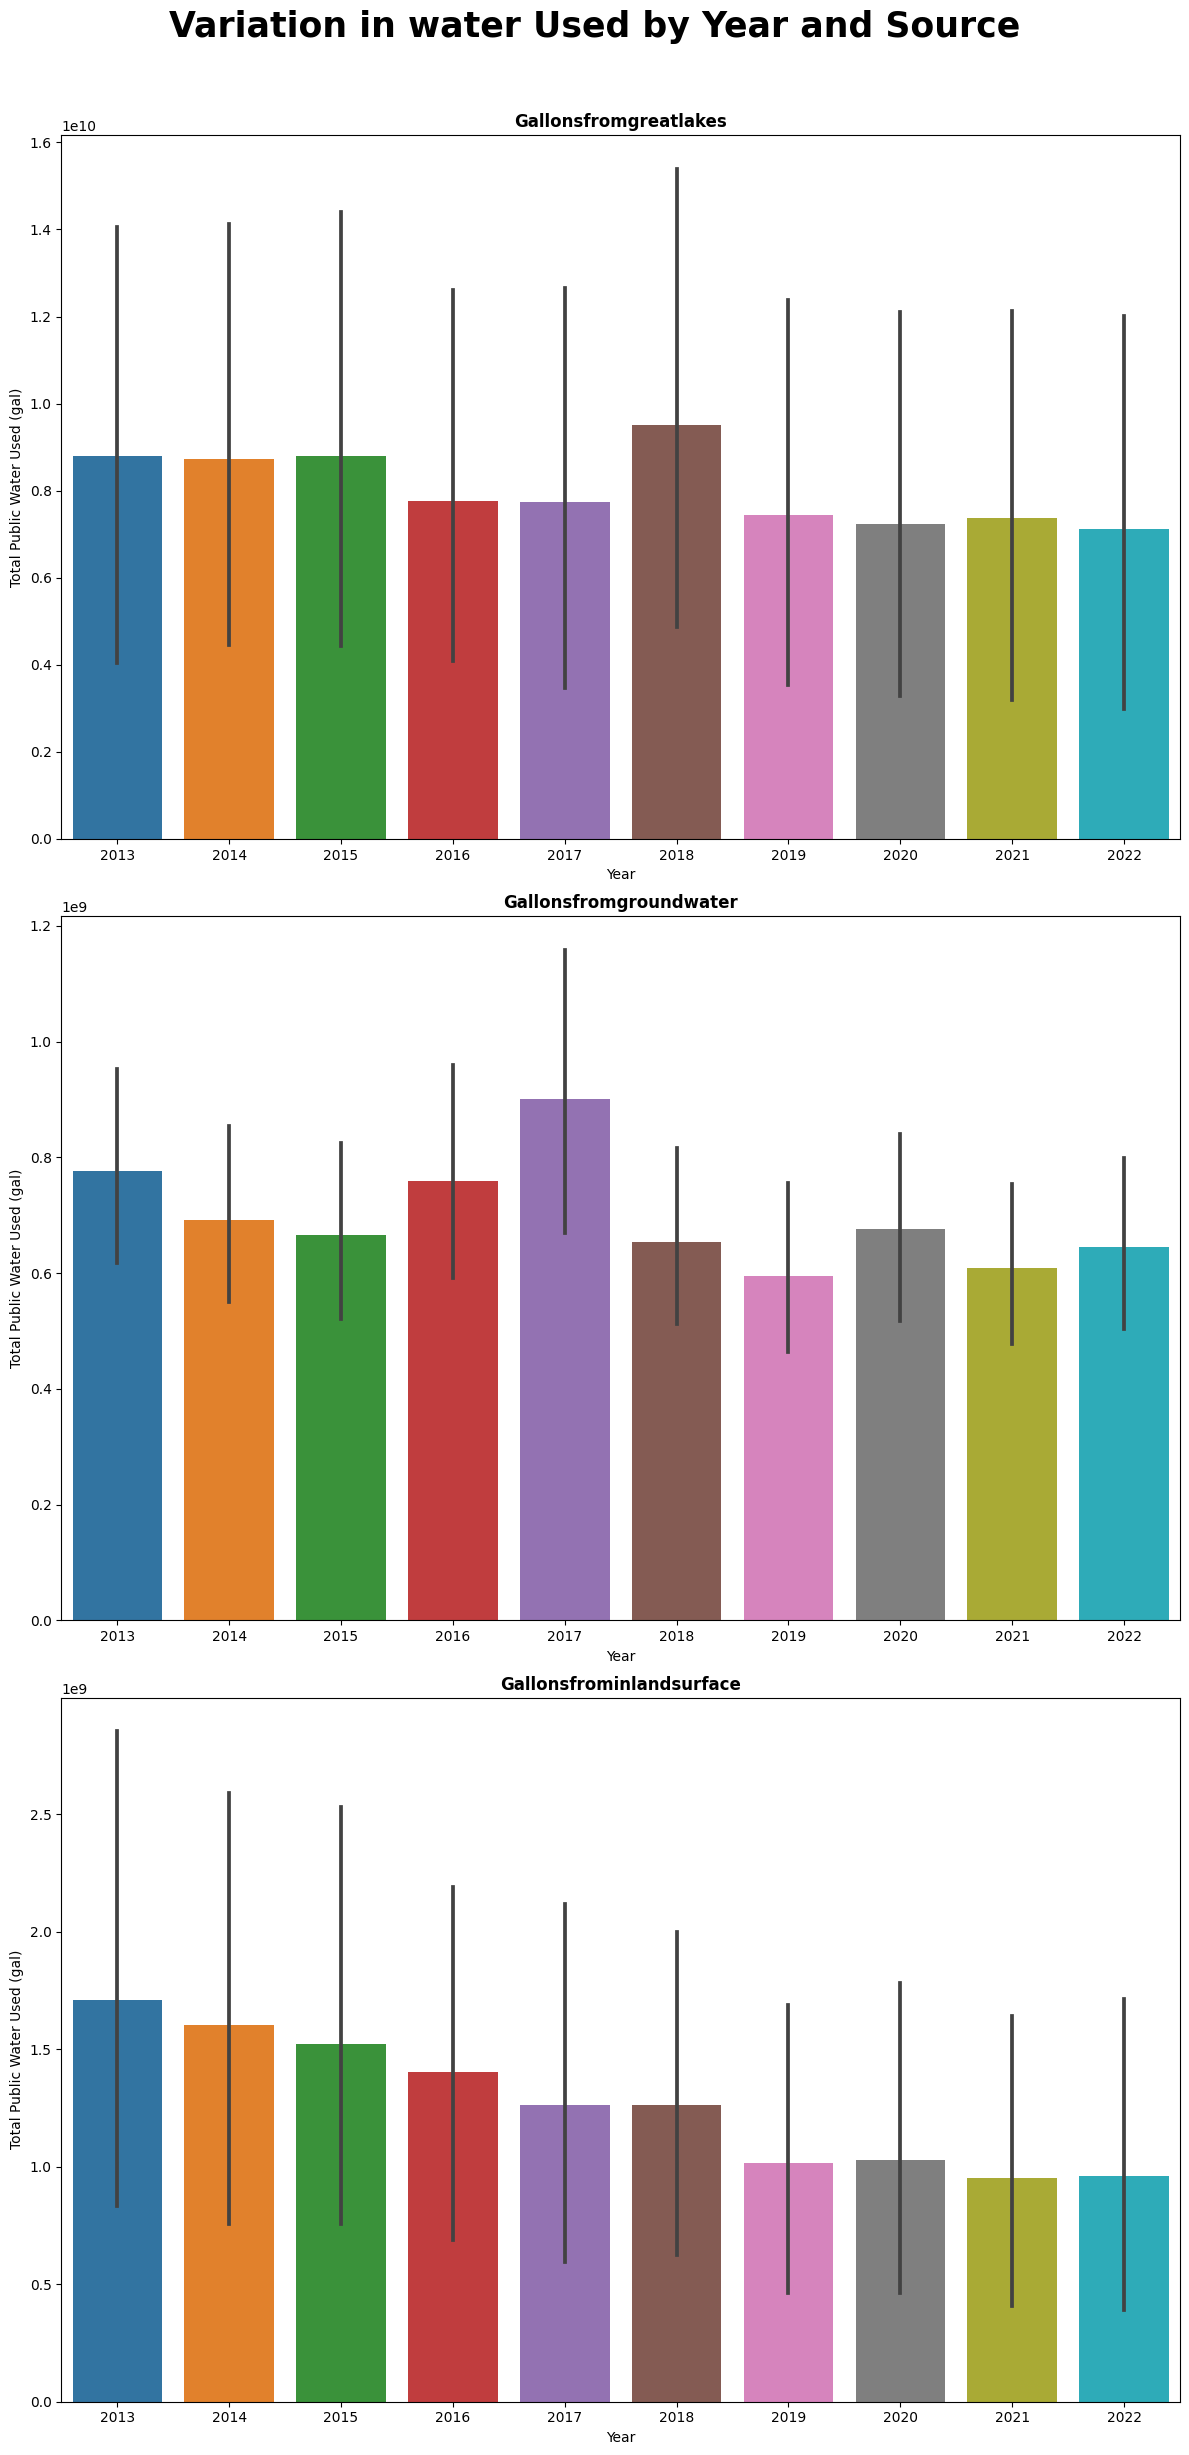

In [11]:
# Define number of rows and columns for the subplot grid
rows = 3
fig, axes = plt.subplots(rows, 1, figsize=(12,25))

# Extraxt unique industry types
water_sources = ['gallons_from_great_lakes',
                'gallons_from_groundwater',
                'gallons_from_inland_surface']

# Subplot colors list
color = sns.color_palette('tab10', 3)

# Loop through colors list
for i in range(rows):
    # Create a line plot for total gallons per year for this industry
    sns.barplot(x='year',
               y=water_sources[i],
               data=df,
               ax=axes[i]
               )
    # Set subplot title as the industry name
    axes[i].set_title(water_sources[i])
    
    # Loop through each subplot and rotate ticks
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(0)
        tick.set_ha('center')
        
    # Setting x and y labels
    axes[i].set_ylabel('Total Public Water Used (gal)')
    axes[i].set_xlabel('Year')
    axes[i].set_title(water_sources[i].replace('_', '').title(), weight='bold')
    
# Adjust layout and appearance
fig.suptitle('Variation in water Used by Year and Source',
            fontsize=25,
            weight='bold')
plt.tight_layout()  # Adjust spacing between subplots
plt.subplots_adjust(top=0.93)
plt.show()

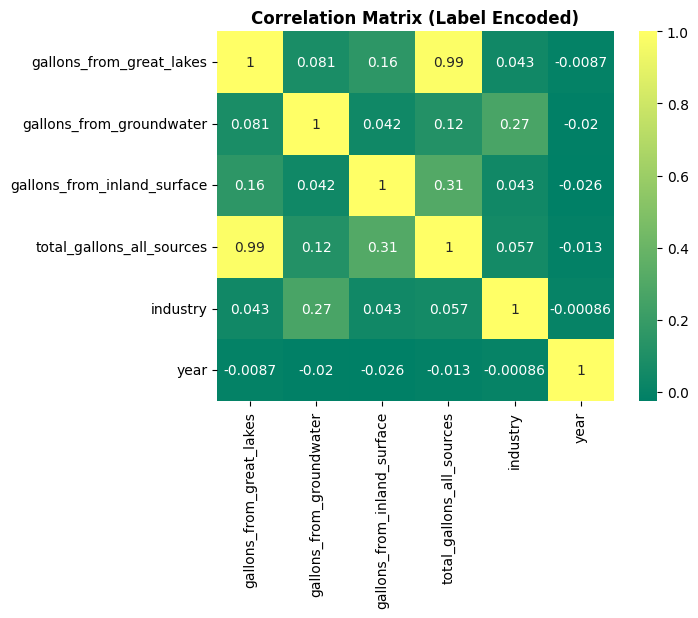

In [12]:
# Drop country column
df_corr = df.drop('county', axis=1)

# Encode industry column
le = LabelEncoder()
df_corr['industry'] = le.fit_transform(df_corr['industry'])

correlation = df_corr.corr() # Calculate correlation matrix
sns.heatmap(correlation, annot=True, cmap='summer')  # Annotate with correlation values
plt.title('Correlation Matrix (Label Encoded)', weight='bold')

plt.show()

# SQL Queries

In [13]:
from pandasql import sqldf # Pandas SQL functionality

**Total water usage by year:**

In [14]:
result1 = sqldf("""
SELECT year, SUM(total_gallons_all_sources)/1000000000 AS total_gallons_Billions
FROM df
GROUP BY year
ORDER BY total_gallons_Billions;
""")
print(result1)

   year  total_gallons_Billions
0  2022                    5795
1  2021                    5930
2  2020                    5939
3  2019                    6009
4  2017                    6571
5  2016                    6586
6  2015                    7176
7  2014                    7314
8  2013                    7488
9  2018                    7586


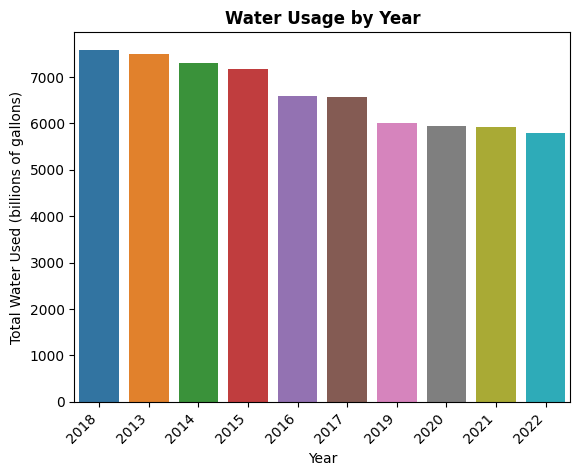

In [15]:
# Sorted values
sorted_result1 = result1.sort_values('total_gallons_Billions', ascending=False).year

# Seanborn barplot
sns.barplot(x='year', y='total_gallons_Billions', data=result1, order=sorted_result1)


# Customize the figure
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year')
plt.ylabel('Total Water Used (billions of gallons)')
plt.title('Water Usage by Year', weight='bold')

# Show plot
plt.show()

**Percentage of water usage by source:**

In [16]:
result2 = sqldf('''
SELECT year, 
(SUM(gallons_from_great_lakes)*100) / SUM(total_gallons_all_sources) AS pct_great_lakes,
(SUM(gallons_from_inland_surface)*100) / SUM(total_gallons_all_sources) AS pct_inland_surface,
(SUM(gallons_from_groundwater)*100) / SUM(total_gallons_all_sources) AS pct_groundwater
FROM df
GROUP BY year
ORDER BY year;
''')
print(result2)

   year  pct_great_lakes  pct_inland_surface  pct_groundwater
0  2013               77                  15                6
1  2014               79                  14                6
2  2015               80                  13                6
3  2016               78                  14                7
4  2017               78                  12                9
5  2018               83                  11                5
6  2019               82                  11                6
7  2020               80                  11                7
8  2021               82                  10                6
9  2022               81                  10                7


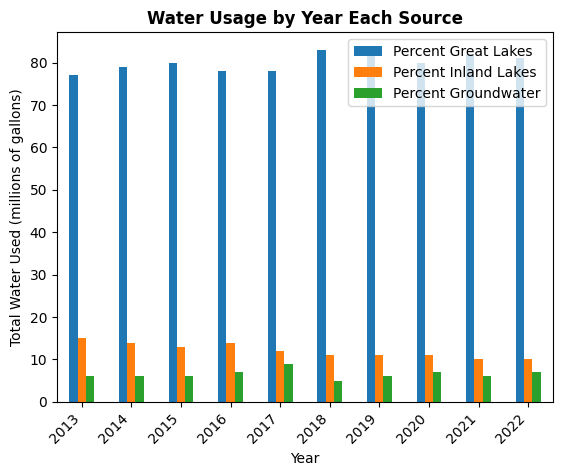

In [17]:
# Pandas plot
result2.plot(kind='bar', x='year')

# Customize the figure
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year')
plt.ylabel('Total Water Used (millions of gallons)')
plt.title('Water Usage by Year Each Source', weight='bold')
plt.legend(['Percent Great Lakes', 'Percent Inland Lakes', 'Percent Groundwater'])

# Show plot
plt.show()

**Top 3 Years for water use**

In [18]:
result3 = sqldf('''
SELECT year, 
SUM(total_gallons_all_sources) / 1000000000 AS total_gallons_all_sources_Billions
FROM df
GROUP BY year
ORDER BY total_gallons_all_sources_Billions DESC
LIMIT 3;
''')
print(result3)

   year  total_gallons_all_sources_Billions
0  2018                                7586
1  2013                                7488
2  2014                                7314


# Credit:

https://www.kaggle.com/code/oleksiimartusiuk/sql-queries-pandas-eda-michigan-water-use/notebook